##### Experiment 1

Model Size: 231MB

Original Repo： Hugging Face

Framework: Tensorflow

NLP Task: Text Classification

Host Config:

```
runtime: python38
service: t5-small-lu

instance_class: F4_1G

automatic_scaling:
  target_cpu_utilization: 0.65
  max_instances: 1

entrypoint: gunicorn -b :$PORT -w 8 main:app --timeout 1200
```

In [1]:
gae_t5_small = 'https://t5-small-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_small = {
  "sentence": sentence,
    "model_name": "t5-small"
  }
import subprocess
import json
import requests

In [2]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_small, 
                         headers=headers, 
                         json=data_t5_small)
print(response.text)

{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}


In [4]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(10):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_small, 
                             headers=headers, 
                             json=data_t5_small)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/10)

Epoch:  0

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>

the time for making the API call is  0:00:31.438438
Epoch:  1

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>

the time for making the API call is  0:00:29.783015
Epoch:  2

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an er

Memory issue observed:
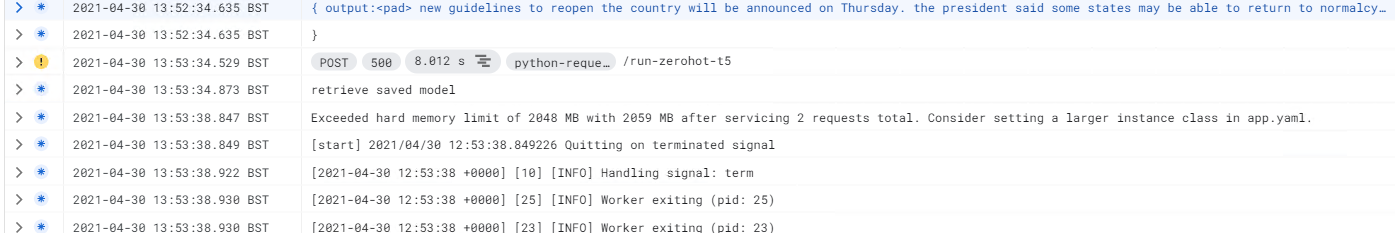

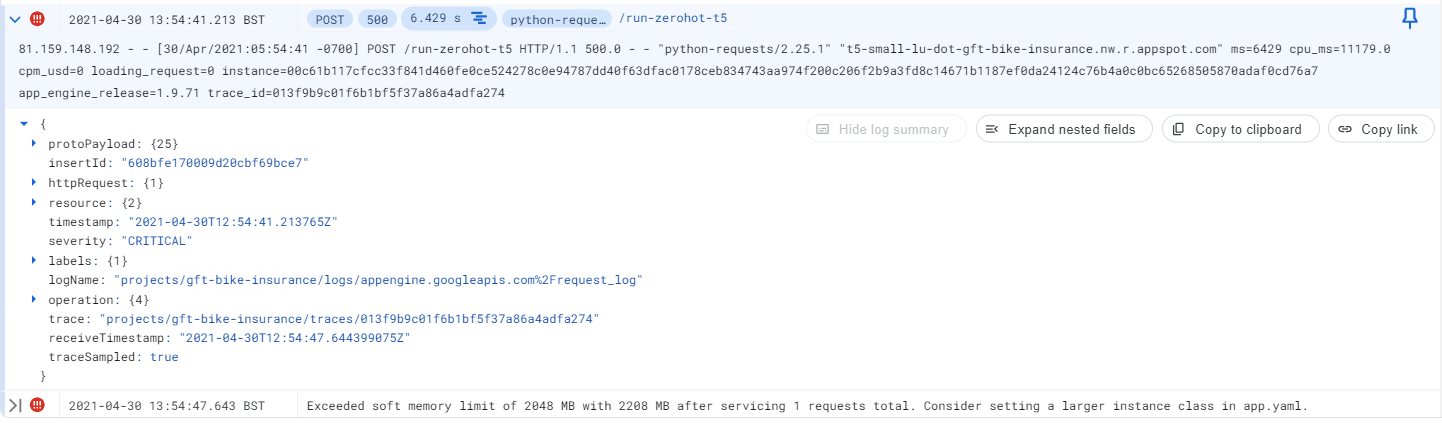

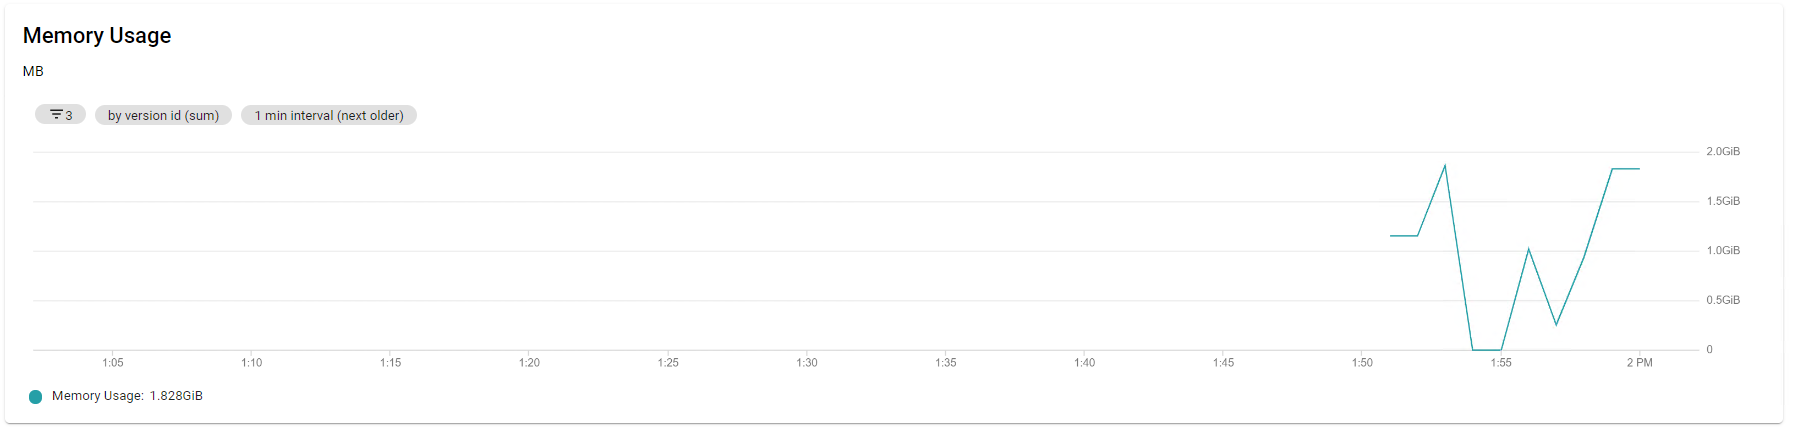

In [5]:
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:01.499710
0:00:25.442905
0:00:38.035258


### Experiment 2

1 instance

Host Config:

```
runtime: python
env: flex
entrypoint: gunicorn -b :$PORT main:app
service: t5-small-lu

runtime_config:
  python_version: 3

manual_scaling:
  instances: 1
resources:
  cpu: 1
  memory_gb: 2
  disk_size_gb: 20

liveness_check:
  initial_delay_sec: 300
  check_interval_sec: 300
  timeout_sec: 4
  failure_threshold: 4
  success_threshold: 2
readiness_check:
  check_interval_sec: 300
  timeout_sec: 4
  failure_threshold: 2
  success_threshold: 2
  app_start_timeout_sec: 1800
```

In [9]:
gae_t5_small = 'https://t5-small-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_small = {
  "sentence": sentence,
    "model_name": "t5-small"
  }

In [6]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_small, 
                         headers=headers, 
                         json=data_t5_small)
print(response.text)

{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}


In [7]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(20):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_small, 
                             headers=headers, 
                             json=data_t5_small)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/20)

Epoch:  0
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:20.537029
Epoch:  1
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:25.124287
Epoch:  2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:20.243890
Epoch:  3
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:21.666232
Epoch:  4
{ output:<pad> new guidelines to reopen the country will be announ

In [8]:
# Latency
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:19.668786
0:00:22.493931
0:00:29.082970


In [9]:
import time
import os                                                                       
import threading

def num_of_requests_processed_within_a_period(secs):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(gae_t5_small, 
                                 headers=headers, 
                                 json=data_t5_small)
        print(response.text)
        num += 1
    return num

In [10]:
import concurrent.futures
ls_num_threads = list(range(1, 5))
tot_num_requests_processed = []
num_secs = 20
print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

for num_threads in ls_num_threads:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs) for param in [num_secs]*num_threads]
        results = [f.result() for f in futures]
        tot_req = sum(results)
        tot_num_requests_processed.append(tot_req)
        print('num_threads is: {};'.format(str(num_threads)), 
              'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                      str(tot_req)))

The throughput is tested within a duration of 20s
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
num_threads is: 1; tot number of requests processed in 20s are 2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
num_threads is: 2; tot number of requests processed in 20s are 2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to norma

### Experiment 3

3 instances

Host Config:

```
...

manual_scaling:
  instances: 3
resources:
  cpu: 1
  memory_gb: 2
  disk_size_gb: 20

....
```

In [11]:
gae_t5_small = 'https://t5-small-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_small = {
  "sentence": sentence,
    "model_name": "t5-small"
  }

In [12]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_small, 
                         headers=headers, 
                         json=data_t5_small)
print(response.text)

{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}


In [13]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(20):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_small, 
                             headers=headers, 
                             json=data_t5_small)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/20)

Epoch:  0
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:27.828099
Epoch:  1
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:22.142746
Epoch:  2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:17.491917
Epoch:  3
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:17.562961
Epoch:  4
{ output:<pad> new guidelines to reopen the country will be announ

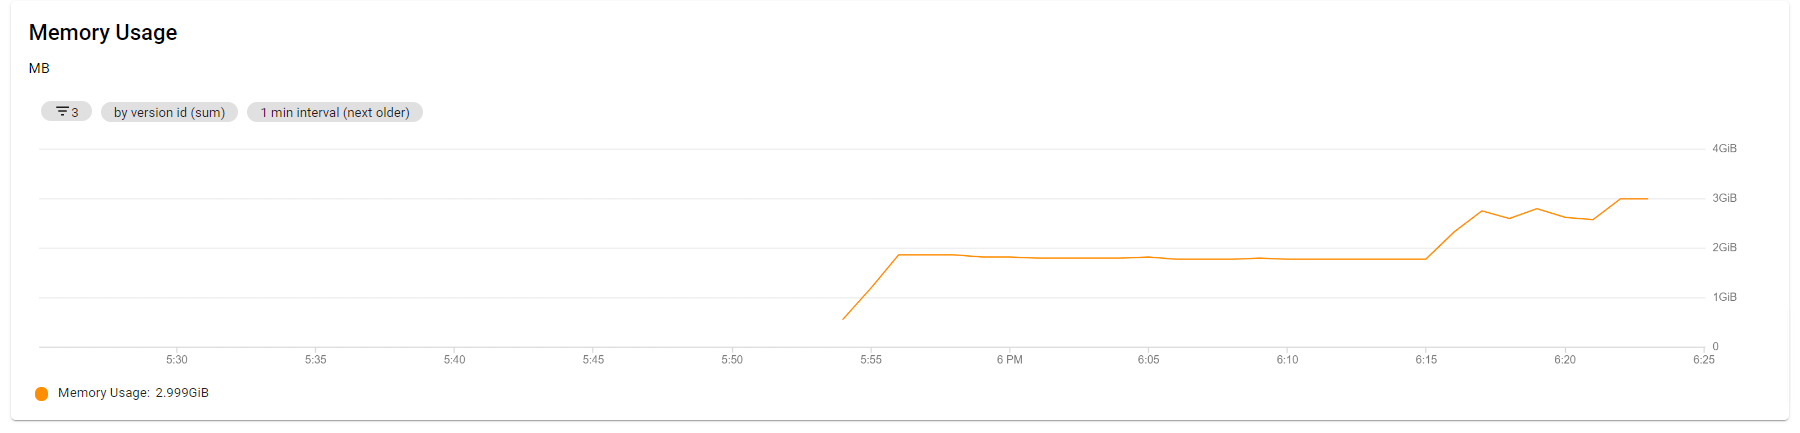

In [14]:
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:15.674621
0:00:19.181796
0:00:28.148009


In [15]:
import time
import os                                                                       
import threading

def num_of_requests_processed_within_a_period(secs):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(gae_t5_small, 
                                 headers=headers, 
                                 json=data_t5_small)
        print(response.text)
        num += 1
    return num

In [16]:
import concurrent.futures
ls_num_threads = list(range(1, 5))
tot_num_requests_processed = []
num_secs = 20
print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

for num_threads in ls_num_threads:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs) for param in [num_secs]*num_threads]
        results = [f.result() for f in futures]
        tot_req = sum(results)
        tot_num_requests_processed.append(tot_req)
        print('num_threads is: {};'.format(str(num_threads)), 
              'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                      str(tot_req)))

The throughput is tested within a duration of 20s
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
num_threads is: 1; tot number of requests processed in 20s are 2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen 

### Experiment 4

1 instances two core

Host Config:

```
...

manual_scaling:
  instances: 1
resources:
  cpu: 2
  memory_gb: 4
  disk_size_gb: 20

....
```

In [17]:
gae_t5_small = 'https://t5-small-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_small = {
  "sentence": sentence,
    "model_name": "t5-small"
  }

In [18]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_small, 
                         headers=headers, 
                         json=data_t5_small)
print(response.text)

{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}


In [19]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(20):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_small, 
                             headers=headers, 
                             json=data_t5_small)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/20)

Epoch:  0
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:14.868519
Epoch:  1
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:14.804660
Epoch:  2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:14.850674
Epoch:  3
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:14.660494
Epoch:  4
{ output:<pad> new guidelines to reopen the country will be announ

In [20]:
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:14.491567
0:00:14.897799
0:00:15.726679


In [21]:
import time
import os                                                                       
import threading

def num_of_requests_processed_within_a_period(secs):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(gae_t5_small, 
                                 headers=headers, 
                                 json=data_t5_small)
        print(response.text)
        num += 1
    return num

In [22]:
import concurrent.futures
ls_num_threads = list(range(1, 5))
tot_num_requests_processed = []
num_secs = 20
print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

for num_threads in ls_num_threads:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs) for param in [num_secs]*num_threads]
        results = [f.result() for f in futures]
        tot_req = sum(results)
        tot_num_requests_processed.append(tot_req)
        print('num_threads is: {};'.format(str(num_threads)), 
              'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                      str(tot_req)))

The throughput is tested within a duration of 20s
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
num_threads is: 1; tot number of requests processed in 20s are 2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
num_threads is: 2; tot number of request

### Experiment 5

1 instances four core

Host Config:

```
...

manual_scaling:
  instances: 1
resources:
  cpu: 4
  memory_gb: 8
  disk_size_gb: 20

....
```

In [23]:
gae_t5_small = 'https://t5-small-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_small = {
  "sentence": sentence,
    "model_name": "t5-small"
  }

In [24]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_small, 
                         headers=headers, 
                         json=data_t5_small)
print(response.text)

{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}


In [25]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(20):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_small, 
                             headers=headers, 
                             json=data_t5_small)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/20)

Epoch:  0
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:11.951181
Epoch:  1
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:12.033031
Epoch:  2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:11.858838
Epoch:  3
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:12.243757
Epoch:  4
{ output:<pad> new guidelines to reopen the country will be announ

In [26]:
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:11.858838
0:00:12.063236
0:00:12.252202


In [27]:
import time
import os                                                                       
import threading

def num_of_requests_processed_within_a_period(secs):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(gae_t5_small, 
                                 headers=headers, 
                                 json=data_t5_small)
        print(response.text)
        num += 1
    return num

In [28]:
import concurrent.futures
ls_num_threads = list(range(1, 5))
tot_num_requests_processed = []
num_secs = 20
print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

for num_threads in ls_num_threads:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs) for param in [num_secs]*num_threads]
        results = [f.result() for f in futures]
        tot_req = sum(results)
        tot_num_requests_processed.append(tot_req)
        print('num_threads is: {};'.format(str(num_threads)), 
              'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                      str(tot_req)))

The throughput is tested within a duration of 20s
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
num_threads is: 1; tot number of requests processed in 20s are 2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
num_threads is: 2; tot number of request

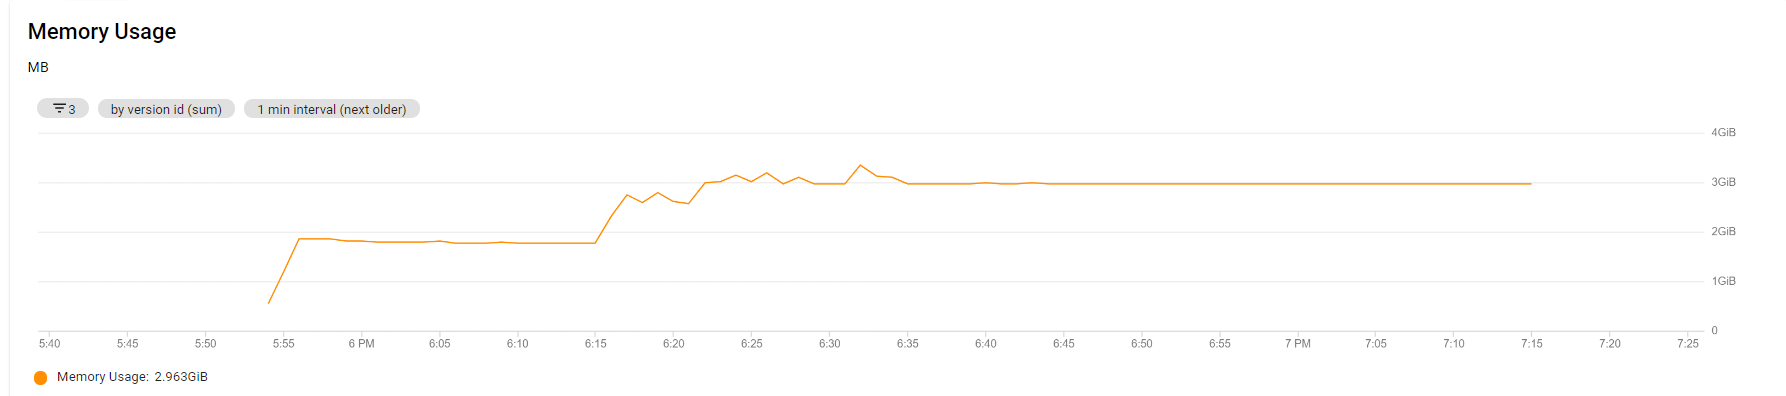